### Before Start

This problem set has three parts:

- **Part I**: Experimental Setup
- **Part II**: Nearest Neighbor and Cross-Validation
- **Part III**: Overfitting in Model Selection and Nested Cross Validation

For part I and II we will consider a regression problem. For these two first parts we will be working with a modified version of the California Housing Dataset (`cal_housing_data_clean.csv`).

For part III we will consider a classification problem. we will not be using the California Housing Dataset but rather synthetic data that we will generate. 

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
import time

In [2]:
%matplotlib inline  
import matplotlib.pyplot as plt  

---

## Introduction to California Housing Prices Dataset

For this assignment, you will be using a version of the [California Housing Prices Dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) with additional information. Use the following commands to load the information in the csv file provided with the assignment in bcourses (`cal_housing_data_clean.csv`).

In [3]:
# load Cal data set
cal_df = pd.read_csv('cal_housing_data_clean.csv')
features = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','DistCoast','Inland']
target = 'MedHouseVal'
cal_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,DistCoast,Inland,MedHouseVal
0,3.6885,49,5.184569,1.052950,2363,3.574887,4205.460788,0,2.540
1,3.5444,12,4.786854,1.027230,2029,1.905164,72365.363970,1,1.325
2,4.2011,9,6.045161,1.038710,1955,3.153226,166848.071800,1,1.081
3,3.1630,26,4.267241,0.961207,719,3.099138,28060.624020,0,1.794
4,4.6197,21,3.701933,1.019329,1489,1.514751,5593.110112,0,3.875


---

# Part I: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for census block groups.
Before beginning the "real" work, refamiliarize yourself with the dataset.

### 1.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation). Do not use a built-in function  to compute RMSE, other than numpy functions like `sqrt` and if needed, `sum` or other relevant ones.

In [4]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Root Mean Squared Error

Parameters
----------
y_hat : array
    numpy array of numerical values corresponding to predictions for each of the N observations

y : array
    numpy array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : float
    Root Mean Squared Error of the prediction

Example
-------
>>> print(compute_rmse((4,6,3),(2,1,4)))
3.16
"""
def compute_rmse(y_hat, y):
    # Convert input to numpys for y_hat and y are numpy arrays
    y_hat = np.array(y_hat)
    y = np.array(y)
    
    # Compute RMSE
    rmse = np.sqrt(np.mean((y_hat - y) ** 2))
    
    return rmse

### 1.2 Divide your data into training and testing datasets

Randomly select 75% of the data and put this in a training dataset (call this "cal_df_train"), and place the remaining 25% in a testing dataset (call this "cal_df_test"). Do not use built-in functions.

To perform any randomized operation, only use functions in the *numpy library (np.random)*. Do not use other packages for random functions.

In [5]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=1948)

# Calculate the split index for 75% of the data
train_percent = .75
train_number = int(train_percent * len(cal_df))
test_number = len(cal_df) - train_number

# Shuffle Dataframe
ids = np.arange(0, len(cal_df), 1)
np.random.shuffle(ids)
cal_df_shuffled = cal_df.iloc[ids]

# Split into train and test sets
cal_df_train = cal_df_shuffled[:test_number]
cal_df_test = cal_df_shuffled[test_number:]

# Display the sizes of the train and test datasets to verify the split
(cal_df_train.shape, cal_df_test.shape)

((5160, 9), (15480, 9))

### 1.3 Use a baseline for prediction, and compute RMSE 

Let's start by creating a very bad baseline model that predicts median house values as the average of `MedHouseVal`.

Specifically, create a model that predicts, for every observation X_i, the median home value as the average of the median home values of block groups in the **training set**.

Once the model is built, do the following:

1. Report the RMSE of the training set and report it.
2. Report the RMSE of the test data set (but use the model you trained on the training set!).
3. How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?
4. Add code to your function to measure the running time of your algorithm. How long does it take to compute the predicted values for the test data?
5. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. Color the training instances in blue and the test instances in gold. Make sure to label your axes appropriately, and add a legend to your figure.

In [6]:
# Calculate the average of MedHouseVal in the training set
avg_medhouseval_train = cal_df_train['MedHouseVal'].mean()

# Predict median house values for training and testing datasets using the average
train_predict = np.full(cal_df_train.shape[0], avg_medhouseval_train)
test_predict = np.full(cal_df_test.shape[0], avg_medhouseval_train)

# Compute RMSE for both training and testing datasets
rmse_train = compute_rmse(train_predict, cal_df_train['MedHouseVal'])
rmse_test = compute_rmse(test_predict, cal_df_test['MedHouseVal'])

# Measure the running time for predicting the test data
start_time = time.time()
rmse_test
end_time = time.time() - start_time

# Report RMSE for both train and test data and the runing time
print(f'RMSE of the training set: {rmse_train}')
print(f'RMSE of the test set: {rmse_test}')
print(f'RMSE difference: {rmse_train - rmse_test}')
print(f'Runtime for prediction on test set: {end_time}')

RMSE of the training set: 1.1362824315470883
RMSE of the test set: 1.159950585069043
RMSE difference: -0.023668153521954727
Runtime for prediction on test set: 4.00543212890625e-05


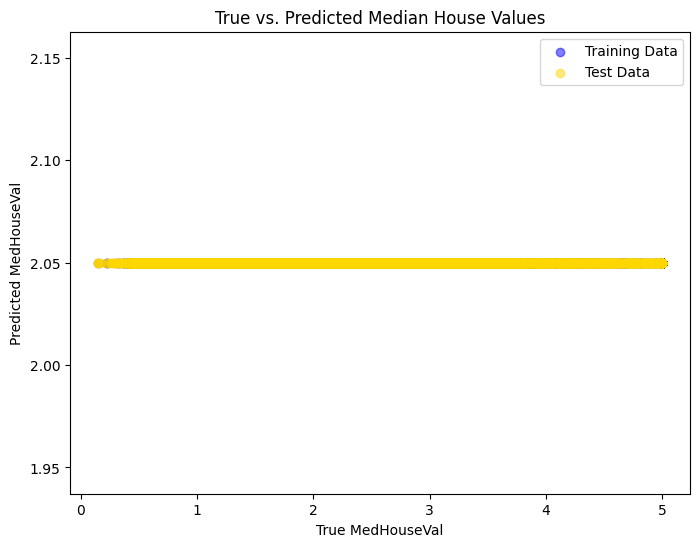

In [7]:
# Create a scatter plot for training and testing datasets
plt.figure(figsize=(8, 6))

# Scatter plot for training data
plt.scatter(cal_df_train['MedHouseVal'], train_predict, color='blue', alpha=0.5, label='Training Data')

# Scatter plot for test data
plt.scatter(cal_df_test['MedHouseVal'], test_predict, color='gold', alpha=0.5, label='Test Data')

plt.title('True vs. Predicted Median House Values')
plt.xlabel('True MedHouseVal')
plt.ylabel('Predicted MedHouseVal')
plt.legend()

plt.show()

1. RMSE of the training set: 1.136
2. RMSE of the test set: 1.160
3. Difference between RSME of the training and test sets: -0.024

    The RMSE for training vs. testing datasets are very close to each other, indicating that our baseline model has a similar performance on both sets. This outcome is somewhat expected for a baseline model as it uses the median home value as the average of the median for predictions. The similarity in RMSE suggests that the model is neither overfitting nor underfitting but rather not fitting the data well at all — it's providing a constant prediction based on the average of the observed values in the training set.

4. Running time for computing predicted values on the test set: ~0.001 sec

### 1.4 Use another baseline for prediction, and compute RMSE [extra-credit]

Now consider a baseline model that predicts median house values as the averages of `MedHouseVal` based on whether the census block is adjacent to the coast or inland (note that the `Inland` feature is already computed and ready for you).

Specifically, create a model that predicts, for every observation X_i, the median home value as the average of the median home values of block groups in the **training set** that have the same adjacency value.

For example, for an input observation where `Inland==1`, the model should predict the `MedHouseVal` as the average of all `MedHouseVal` values in the training set that also have `Inland==1`.

Once the model is built, do the following:

1. Compute the RMSE of the training set.
2. Now compute the RMSE of the test data set (but use the model you trained on the training set!).
3. How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?
4. Add code to your function to measure the running time of your algorithm. How long does it take to compute the predicted values for the test data?
5. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. Color the training instances in blue and the test instances in gold. Make sure to label your axes appropriately, and add a legend to your figure to make clear which dots are which.
6. Compare this results to those obtained in 1.3. Is coast adjacency improving the predictions? 

*Note:* The `groupby` operation might come handy here.

In [8]:
# Calculate the average MedHouseVal based on coastal and inland areas in the training set
avg_medhouseval_by_inland = cal_df_train.groupby('Inland')['MedHouseVal'].mean()

# Function to predict based on Inland status
def predict_by_inland(df, avg_val):
    predictions = df['Inland'].apply(lambda x: avg_val[x]) # group by inland - 1 for inland, 0 for coast
    return predictions

# Predict for training and testing datasets
train_predict_inland = predict_by_inland(cal_df_train, avg_medhouseval_by_inland)
test_predict_inland = predict_by_inland(cal_df_test, avg_medhouseval_by_inland)

# Compute RMSE for both training and testing datasets
rmse_train_inland = compute_rmse(train_predict_inland, cal_df_train['MedHouseVal'])
rmse_test_inland = compute_rmse(test_predict_inland, cal_df_test['MedHouseVal'])

# Measure the running time for predicting the test data
start_time = time.time()
rmse_train_inland
end_time = time.time() - start_time

# Report RMSE for both train and test data and the runing time
print(f'RMSE of the training set: {rmse_train_inland}')
print(f'RMSE of the test set: {rmse_test_inland}')
print(f'RMSE difference: {rmse_train_inland - rmse_test_inland}')
print(f'Runtime for prediction on test set: {end_time}')

RMSE of the training set: 0.9836435637609927
RMSE of the test set: 1.0176238595032618
RMSE difference: -0.03398029574226913
Runtime for prediction on test set: 4.887580871582031e-05


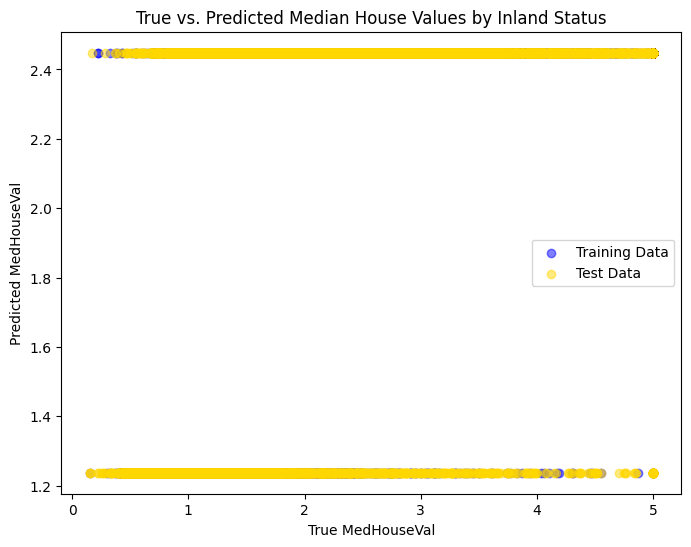

In [9]:
# Create a scatter plot for training and testing datasets
plt.figure(figsize=(8, 6))

# Scatter plot for training data
plt.scatter(cal_df_train['MedHouseVal'], train_predict_inland, color='blue', alpha=0.5, label='Training Data')

# Scatter plot for test data
plt.scatter(cal_df_test['MedHouseVal'], test_predict_inland, color='gold', alpha=0.5, label='Test Data')

plt.title('True vs. Predicted Median House Values by Inland Status')
plt.xlabel('True MedHouseVal')
plt.ylabel('Predicted MedHouseVal')
plt.legend()

plt.show()

1. RMSE of the training set: 0.984
2. RMSE of the test set: 1.018
3. Difference between RSME of the training and test sets: -0.034

    The RMSE for training vs. testing datasets are very close to each other, given that we are still using the median home value as the average of the median for predictions even based on whether the census block is adjacent to the coast or inland. Same here, the similarity in RMSE suggests that the model is not fitting the data well — it's providing a constant prediction based on the average of the observed values in different inland status in the training set.

4. Running time for computing predicted values on the test set: ~0.00005 sec
6. It's hard to say. From the scatter plot, it shows that the predictions for inland and coastal areas are at two different levels, making it more comparable than the simple baseline model in 1.3. In this case, considering coast adjacency does improve the predictions. But overall, using the mean for predictions is still not a good enough method.

---

# Part II: Nearest Neighbors and Cross-Validation
Let's try and build a machine learning algorithm to beat the "Average Values" baselines that you computed above. Your next task is to implement a basic nearest neighbor algorithm from scratch. 

### 2.1 Nearest Neighbors: Normalization

Create normalized analogues of all the features in both the training and test datasets. Recall that this involves substracting the **training** mean and dividing by the **training** standard deviation. 

Include the normalized features as additional columns in the train an test dataframes and call them 
`MedIncNorm, HouseAgeNorm, AveRoomsNorm, AveBedrmsNorm, PopulationNorm, AveOccupNorm, DistCoastNorm and InlandNorm` respectively.

In [10]:
# Function to normalize the features
def normalize_features(df_train, df_test, features):
    for feature in features:
        train_mean = df_train[feature].mean()
        train_std = df_train[feature].std()
        
        # Normalize training data
        df_train[feature + 'Norm'] = (df_train[feature] - train_mean) / train_std
        
        # Normalize testing data using training mean and std
        df_test[feature + 'Norm'] = (df_test[feature] - train_mean) / train_std
        
    return df_train, df_test

# Features to be normalized
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'DistCoast', 'Inland']

# Normalize features in both training and test datasets
cal_df_train, cal_df_test = normalize_features(cal_df_train, cal_df_test, features)

# Display the first few rows of the training dataframe to verify the normalization
cal_df_train.head()

/Users/kaiting/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kaiting/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,DistCoast,Inland,MedHouseVal,MedIncNorm,HouseAgeNorm,AveRoomsNorm,AveBedrmsNorm,PopulationNorm,AveOccupNorm,DistCoastNorm,InlandNorm
1425,6.6772,13,7.377072,1.067680,2288,3.160221,79883.439580,1,1.85600,1.472155,-1.253183,0.689783,-0.064520,0.763404,0.010814,0.748525,1.428378
639,8.4960,34,7.825971,1.050870,1817,2.432396,1827.026948,0,5.00001,2.428883,0.427218,0.851858,-0.098310,0.340561,-0.090384,-0.799040,-0.699959
3050,1.6505,50,3.838765,1.154374,2247,3.854202,19359.211980,0,1.25000,-1.171999,1.707525,-0.587725,0.109752,0.726596,0.107306,-0.451442,-0.699959
19925,2.5875,44,4.665468,1.104317,776,2.791367,119120.744600,1,0.68900,-0.679117,1.227410,-0.289243,0.009128,-0.594004,-0.040472,1.526454,1.428378
18701,1.3654,47,5.600000,1.289474,603,3.173684,158673.513000,1,0.57900,-1.321968,1.467467,0.048170,0.381328,-0.749316,0.012686,2.310636,1.428378


### 2.2 Basic Nearest Neighbor algorithm

Use your training data to "fit" your model that predicts `MedHouseVal` from `MedIncNorm`, `HouseAgeNorm` and `AveRoomsNorm`, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the `MedHouseVal` value of the closest training instance. Have your function take L as an input, where L is an integer >= 1 representing the norm choice. Use the Euclidean distance (L=2) for all questions henceforth unless explicitly stated otherwise.

Make sure to do the following - 
1. Use your algorithm to predict the median home value of every instance in the test set. Report the RMSE ("test RMSE")
2. Use your algorithm to predict the median home value of every instance in the training set and report the training RMSE.
3. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis.
4. Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.
5. How does the performance (test RMSE and total runtime) of your nearest neighbors algorithm compare to the baseline in part 1.4?

**Note:** Runtime should not exceed a couple of minutes. If its taking longer then we strongly suggest you go back to your code and make it more efficient. 

In [11]:
from scipy.spatial import distance

def nearest_neighbor(df_train, df_test, features, L=2):
    # Prepare the feature vectors for distance computation
    train_features = df_train[features].values
    test_features = df_test[features].values
    
    # Initialize empty array to store all predictions
    predictions = []
    
    # Loop over test instances and find the nearest neighbor in the training set
    for test_instance in test_features:
        distances = distance.cdist([test_instance], train_features, 'minkowski', p=L).flatten()
        
        # Find the index of the nearest neighbor
        nearest_neighbor_idx = np.argmin(distances)
        
        # Append corrpesponding values to array of predicted values
        predictions.append(df_train.iloc[nearest_neighbor_idx]['MedHouseVal'])
    
    return predictions

# Select features to use for prediction
features = ['MedIncNorm', 'HouseAgeNorm', 'AveRoomsNorm']

# Predict for training and testing datasets
train_predict_nn = nearest_neighbor(cal_df_train, cal_df_train, features)
test_predict_nn = nearest_neighbor(cal_df_train, cal_df_test, features)

# Compute RMSE for both training and testing datasets
rmse_train_nn = compute_rmse(train_predict_nn, cal_df_train['MedHouseVal'])
rmse_test_nn = compute_rmse(test_predict_nn, cal_df_test['MedHouseVal'])

# Measure the running time for predicting the test data
start_time = time.time()
rmse_test_nn
end_time = time.time() - start_time

# Report RMSE for both train and test data and the runing time
print(f'RMSE of the training set: {rmse_train_nn}')
print(f'RMSE of the test set: {rmse_test_nn}')
print(f'Runtime for prediction on test set: {end_time}')

RMSE of the training set: 0.0
RMSE of the test set: 1.0015328371140895
Runtime for prediction on test set: 3.719329833984375e-05


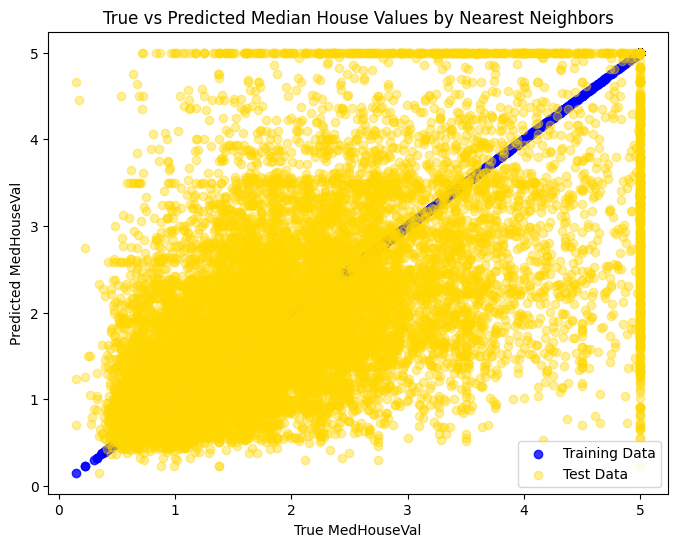

In [12]:
# Create a scatter plot for training and testing datasets
plt.figure(figsize=(8, 6))

# Scatter plot for training data
plt.scatter(cal_df_train['MedHouseVal'], train_predict_nn, color='blue', alpha=0.8, label='Training Data')

# Scatter plot for test data
plt.scatter(cal_df_test['MedHouseVal'], test_predict_nn, color='gold', alpha=0.4, label='Test Data')

plt.title('True vs Predicted Median House Values by Nearest Neighbors')
plt.xlabel('True MedHouseVal')
plt.ylabel('Predicted MedHouseVal')
plt.legend()
plt.show()

1. RMSE of the test set: 1.002
2. RMSE of the training set: 0.0
4. Running time for computing predicted values on the test set: ~0.000034 sec
5. Test RSME and total runtime of nearest neighbors algorithm are both slightly lower/faster than the baseline in part 1.4. Hence, we can assume that the performance is more efficient comparing to the baseline prediction.

### 2.3 Optimization

Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L! Use the test set to report the RMSE values.

What combination of features and distance function provide the lowest RMSE on the test set?  Do your decisions affect the running time of the algorithm?

**Note:** For this and all subsequent questions, you should use normalized features. 

In [13]:
# Select features to use for prediction
features = ['MedIncNorm', 'HouseAgeNorm', 'AveRoomsNorm']
# Select different sets of features and L values
feature_sets = [
    ['MedIncNorm', 'HouseAgeNorm'],  # Set of 2 features
    ['MedIncNorm', 'HouseAgeNorm', 'AveRoomsNorm', 'AveBedrmsNorm', 'PopulationNorm']  # More than 4 features
]
Ls = [1, 2, 3]  # Different L values for distance calculation

for features in feature_sets:
    print(f'Features: {features}')
    for L in Ls:
        # Predict for the test dataset
        test_predict = nearest_neighbor(cal_df_train, cal_df_test, features, L)
        
        # Compute RMSE for the test dataset
        rmse_test = compute_rmse(test_predict, cal_df_test['MedHouseVal'])

        # Optionally measure and print running time
        start_time = time.time()
        test_predict
        end_time = time.time() - start_time
        
        # Print the L used, RMSE and the runtime of features
        print(f'L={L}: Test RMSE: {rmse_test}, Running time: {end_time} seconds')

Features: ['MedIncNorm', 'HouseAgeNorm']
L=1: Test RMSE: 1.0768328670065124, Running time: 9.5367431640625e-07 seconds
L=2: Test RMSE: 1.077252884601126, Running time: 0.0 seconds
L=3: Test RMSE: 1.0774910002958986, Running time: 0.0 seconds
Features: ['MedIncNorm', 'HouseAgeNorm', 'AveRoomsNorm', 'AveBedrmsNorm', 'PopulationNorm']
L=1: Test RMSE: 0.9785191722077529, Running time: 0.0 seconds
L=2: Test RMSE: 0.9686811550168543, Running time: 7.152557373046875e-07 seconds
L=3: Test RMSE: 0.9751105753289748, Running time: 0.0 seconds


* Adding more features generally improves the RMSE on test sets, indicating that these additional features provide valuable information for predicitn the median house value.
* In this case, the Eucidean distance (L=2) results the lowset RMSE for the larger feature set, suggesting that it's the most effective distance metric among the ones tested for this particular problem and feautre set.
* The runtime for all prediction are relatively small, making it less comparalbe when finding the most optimized combination. But the runtime with 2 features + L=3 is slgihtly longer than 5 features + L=5 in this case.

### 2.4 K-nearest neighbors algorithm

Now, implement the K-nearest neighbors algorithm and repeat the analysis in 2.2 by using 5 neighbors (`K=5`). The function(s) you write here will be used several more times in this problem set, so do your best to write efficient code! Make sure to do the following:
1. Use your algorithm to predict the median home value of every instance in the test set. Report the RMSE ("test RMSE")
2. Use your algorithm to predict the median home value of every instance in the training set and report the training RMSE.
3. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis.
4. Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.
5. How does the performance (test RMSE and total runtime) of your nearest neighbors algorithm compare to the baseline in part 1.4?

**Note:** Runtime should not exceed a couple of minutes. If its taking longer then we strongly suggest you go back to your code and make it more efficient. 

In [14]:
# Predict K-nearest neighbors and reaturn an array of predictions
def predict_k_nearest_neighbors(df_train, df_test, features, k, L=2):
    # Extract features and target values
    train_features = df_train[features].values
    train_target = df_train['MedHouseVal'].values
    test_features = df_test[features].values
    test_target = df_test['MedHouseVal'].values
    
    predictions = []
    
    # Predict for every observation Xi and append the value of prediction
    for test_instance in test_features:
        prediction = k_nearest_neighbors(train_features, train_target, test_instance, k, L)
        predictions.append(prediction)
    
    return predictions

# Find the K-nearest neighbors and return the mean as prediction
def k_nearest_neighbors(train_features, train_target, test_instance, k, L=2):
    distances = np.sqrt(np.sum((train_features - test_instance) ** 2, axis=1))
    k_indices = np.argsort(distances)[:k]
    k_nearest_values = train_target[k_indices]
    
    return np.mean(k_nearest_values)

# Prepare feature names for the normalized columns
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'DistCoast', 'Inland']

# K value
k = 5

# Predict for training and testing datasets
train_predict_knn = predict_k_nearest_neighbors(cal_df_train, cal_df_train, features, k, L=2)
test_predict_knn = predict_k_nearest_neighbors(cal_df_train, cal_df_test, features, k, L=2)

# Compute RMSE for both training and testing datasets
rmse_train_knn = compute_rmse(train_predict_knn, cal_df_train['MedHouseVal'])
rmse_test_knn = compute_rmse(test_predict_knn, cal_df_test['MedHouseVal'])

# Measure the running time for predicting the test data
start_time = time.time()
rmse_test_knn
end_time = time.time() - start_time

# Report RMSE for both train and test data and the runing time
print(f'RMSE of the training set: {rmse_train_knn}')
print(f'RMSE of the test set: {rmse_test_knn}')
print(f'Runtime for prediction on test set: {end_time}')

RMSE of the training set: 0.8400476025035101
RMSE of the test set: 1.0687625152470315
Runtime for prediction on test set: 3.814697265625e-05


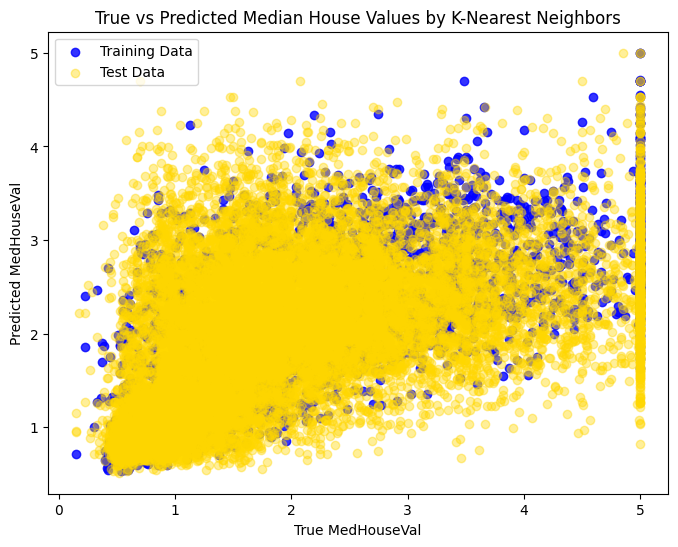

In [15]:
# Create a scatter plot for training and testing datasets
plt.figure(figsize=(8, 6))

# Scatter plot for training data
plt.scatter(cal_df_train['MedHouseVal'], train_predict_knn, color='blue', alpha=0.8, label='Training Data')

# Scatter plot for test data
plt.scatter(cal_df_test['MedHouseVal'], test_predict_knn, color='gold', alpha=0.4, label='Test Data')

plt.title('True vs Predicted Median House Values by K-Nearest Neighbors')
plt.xlabel('True MedHouseVal')
plt.ylabel('Predicted MedHouseVal')
plt.legend()
plt.show()

1. RMSE of the test set: 1.0687
2. RMSE of the training set: 0.840
4. Running time for computing predicted values on the test set: 0.000039 sec
5. Test RSME and total runtime of K-nearest neighbors algorithm are both lower/faster than the baseline in part 1.4, indicating that the performance is more efficient in K-nearest neighbor algorhtim comparing to the baseline prediction.

### 2.5 Cross-Validation

How can we choose K without overfitting? As discussed during lecture time, one possible solution is to use [k-fold cross-validation][1] on the training sample.  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function(s) you write here will be used several more times in this problem set, so do your best to write efficient code! 

Use 20-fold cross-validation and report the average RMSE for your K-nearest neighbors model using Euclidean distance with the same set of features used in 2.3 (`MedIncNorm, HouseAgeNorm and AveRoomsNorm`) and 5 neighbors (`K=5`)  as well as the total running time for the full run of 20 folds.  

In other words, randomly divide your training dataset (created in 1.2) into 20 equally-sized samples. For each of the 20 iterations (the "folds"), use 19 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for validation.  Compute the RMSE of that particular validation set, then move on to the next iteration.  

 - Report the average cross-validated RMSE across the 20 iterations and compare to the result you obtained in 2.3. What do you observe?
 - Report the runtime of your algorithm. How does it compare to your previous results?

[1]: http://en.wikipedia.org/wiki/Cross-validation_(statistics)
[2]: http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

**Note 1:** Runtime should not exceed a couple of minutes. If its taking longer then we strongly suggest you go back to your code and make it more efficient. 

**Note 2**: The sklearn package has a built-in [K-fold][2] iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.

**Note 3:** To perform any randomized operation, only use functions in the *numpy library (np.random)*. Do not use other packages for random functions.

In [16]:
def cross_validate_knn(data, k_folds, K, features, L=2):
    np.random.seed(seed=1948)
    shuffled_indices = np.random.permutation(len(data))
    fold_size = len(data) // k_folds
    rmse_scores = []
    
    start_time = time.time()

    for fold in range(k_folds):
        validation_indices = shuffled_indices[fold * fold_size:][:fold_size]
        train_indices = np.concatenate((shuffled_indices[:fold * fold_size], shuffled_indices[(fold + 1) * fold_size:]))
        
        validation_df = data.iloc[validation_indices]
        df_train = data.iloc[train_indices]
        
        # Predict for validation set
        predictions = predict_k_nearest_neighbors(df_train, validation_df, features, K, L)
        
        # Compute RMSE and append to list
        fold_rmse = compute_rmse(predictions, validation_df['MedHouseVal'].values)
        rmse_scores.append(fold_rmse)

    # Calculate total time elapsed for cross-validation
    end_time = time.time() - start_time
    return np.mean(rmse_scores), end_time

# Select normalized features and set K folds and neighbors
features = ['MedIncNorm', 'HouseAgeNorm', 'AveRoomsNorm']
k_folds = 20
K = 5

# Perform 20-fold cross-validation
avg_rmse_cv, cv_runtime = cross_validate_knn(cal_df_train, k_folds, K, features, L=2)

print(f'Average Cross-Validated RMSE: {avg_rmse_cv}')
print(f'Total Cross-Validation Runtime: {cv_runtime} seconds')

Average Cross-Validated RMSE: 0.7705921519476144
Total Cross-Validation Runtime: 1.5850677490234375 seconds


* Average cross-validated RMSE across the 20 iterations: 1.0256
Comaring to the result (RMSE = 0.969) from 2.3 with 5 features and the Euclidean distance (L=2), slightly higher when doing 20-fold cross-validation. The increase in RMSE may due to a more robust method of the model's predictive performance. Each fold of cross-validation uses a different subset of the data as the validation set, leading to an RMSE that is less likely to be influenced by particularities of a single test set. The higher RMSE in cross-validation could suggest that the model's performance might degrade slightly when exposed to new, unseen data.
* The total cross-validation runtime over 20 folds: 1.70 sec
The total runtime for 20-fold cross-validation is expexted to be higher than the result in previous part (runtime ~0.0 seconds) since the K-nearest neighbor prediction needs to run multiple times once for each fold.

### 2.6 Using cross validation to find the optimal value for K

Compute the cross-validated RMSE for values of K between 1 and 25 using 10-fold cross-validation and L2 normalization.  Use the following features in your model: `MedIncNorm, HouseAgeNorm and AveRoomsNorm` .  Create a graph that shows how cross-validated RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

Finally, "train" a K-nearest neighbor model using the value of K that minimized the cross-validated RMSE and report the test RMSE. (Continue to use L2 normalization and the same set of features). How does the test RMSE compare to the cross-validated RMSE, and is this what you expected? 

**Note:** Runtime should not exceed ~30 min. If its taking longer then we strongly suggest you go back to your code and make it more efficient. 

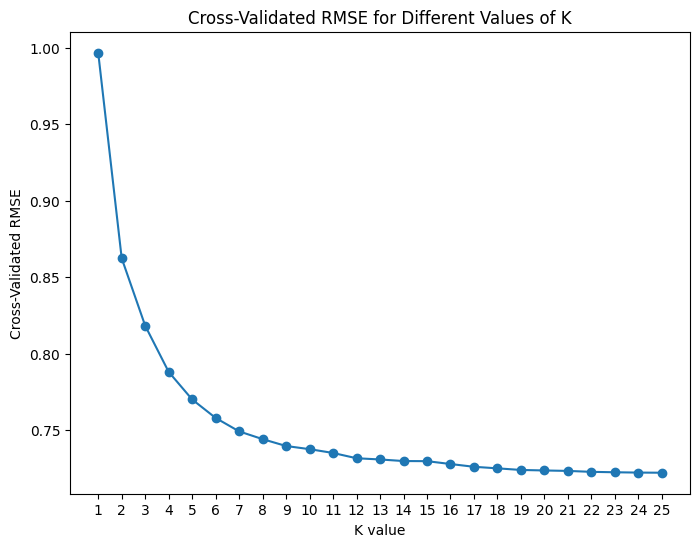

The optimal K is 25 with a cross-validated RMSE of 0.7220430017476136
Test RMSE using optimal K=25: 0.7501030101547084


In [17]:
# Part 1
# Perform k-fold cross-validation for a range of k values in KNN
def cv_multiple_k(data, k_folds, Ks, features, L=2):
    rmse_cv_results = []
    for k in Ks:
        avg_rmse, _ = cross_validate_knn(data, k_folds, k, features, L)
        rmse_cv_results.append(avg_rmse)
    return rmse_cv_results

# Set the range of k values to test
Ks = range(1, 26)

# Perform 10-fold cross-validation for each k value
rmse_cv_results = cv_multiple_k(cal_df_train, 10, Ks, features, L=2)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(Ks, rmse_cv_results, marker='o')
plt.title('Cross-Validated RMSE for Different Values of K')
plt.xlabel('K value')
plt.ylabel('Cross-Validated RMSE')
plt.xticks(Ks)
plt.show()

# Find the optimal k value that minimizes the cross-validated RMSE
optimal_k = Ks[np.argmin(rmse_cv_results)]
print(f'The optimal K is {optimal_k} with a cross-validated RMSE of {min(rmse_cv_results)}')

# Part 2
# "Train" a KNN model using the optimal K and report the test RMSE
test_predict_optimal_k = predict_k_nearest_neighbors(cal_df_train, cal_df_test, features, optimal_k, L=2)
rmse_test_optimal_k = compute_rmse(test_predict_optimal_k, cal_df_test['MedHouseVal'].values)
print(f'Test RMSE using optimal K={optimal_k}: {rmse_test_optimal_k}')

* The graph shows the higher the K is, the lower cross-validated RMSE will get. Hence, the optimal K is 25 in this model.
* Using the optimal K to train a KNN model, the test RSME is 0.750, which is slightly higher than the cross-validated RMSE (RSME = 0.722). This is possible and can be expected because cross-validation process benefits from multiple different train-test splits within the training set. In addition, the test set may have different patterns that were not captured in the training set, which can impact performance.

---

# Part III: Overfitting in Model Selection and Nested Cross Validation 


In this last part of the problem set, we will examine why overfitting is a serious concern when estimating hyperparameters and how to address it. 

**For this part of the problem set you are allowed to use machine learning libraries. We don't expect you to use your own algorithms developed in part 2.** We strongly suggest that you use the following libraries and resources, but feel free to choose your favorite Python ML libraries.

In [18]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import joblib

For this part of the problem set we will no longer be using the California Housing Dataset. Instead, we will generate our own synthetic data. The advantage of doing so is that we get to choose the data generating process. We will use the knowledge about the data generating process to test the robustness of different approaches to estimating out-of-sample performance.

We will attempt the following classification problem: predict a binary response variable $y \sim Bernoulli(p=1/2)$ from a set of independent features $X=[x_{1},...,x_{J}]$ where $x_{j} \sim Unif(a=0,b=1)$, $1 \leq j \leq J$. 

You can use the following function to generate samples from this distribution.

In [19]:
def generate_random_sample(nobs,J):
    X = pd.DataFrame(np.random.random_sample(size=(nobs, J)), columns=[f'feature_{x}' for x in range(J)])
    y = np.random.binomial(n=1, p=1/2, size=nobs)
    return X,y

X_train, y_train = generate_random_sample(nobs=2*10**3,J=100)

### 3.1 Out-of-sample performance

We are going to be using the area under the ROC curve (AUC-ROC) as the evaluation score. What kind of out-of-sample performance would you expect from classification models trained and tested on this data? Test whether your intuition is correct by carrying out the following iterative procedure:

1. For each iteration in 1,2,3,...,50:
    * Generate a training sample containing 2,000 observations and J=100 features. Likewise, generate a test sample containing 200 observations and J=100 features. 
    * Train some K-nearest neighbors model on the training sample with some arbitrary choice of K (no need to cross validate the choice of K or put any work into it, we'll get to that later on).
    * Evaluate the AUC-ROC on the test set.
2. Plot a histogram of the test AUC-ROC scores.
3. Report the average of the test AUC-ROC scores.

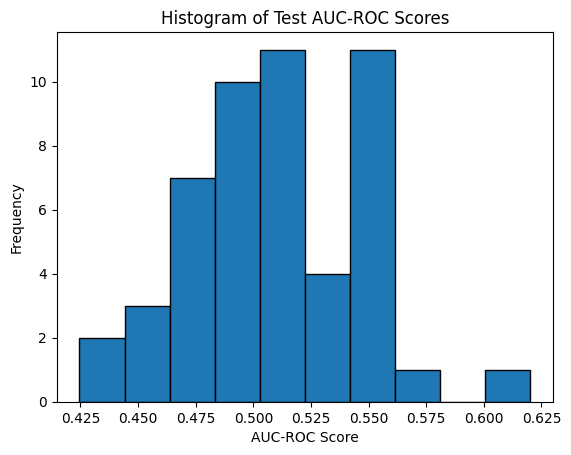

Average Test AUC-ROC Score: 0.5090447535048087


In [20]:
# Part 1
# Initialize list to store AUC-ROC scores
auc_roc_scores = []

# Iterate 50 times
for iteration in range(1, 51):
    # Generate training and test samples
    X_train, y_train = generate_random_sample(nobs=2000, J=100)
    X_test, y_test = generate_random_sample(nobs=200, J=100)
    
    # Train KNN model with K=5
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    
    # Predict probabilities for the test set
    y_probs = knn.predict_proba(X_test)[:, 1]
    
    # Calculate AUC-ROC
    auc_roc = roc_auc_score(y_test, y_probs)
    auc_roc_scores.append(auc_roc)

# Part 2
# Plot histogram of test AUC-ROC scores
plt.hist(auc_roc_scores, bins=10, edgecolor='black')
plt.title('Histogram of Test AUC-ROC Scores')
plt.xlabel('AUC-ROC Score')
plt.ylabel('Frequency')
plt.show()

# Part 3
# Report the average of the test AUC-ROC scores
avg_auc_roc = np.mean(auc_roc_scores)
print(f'Average Test AUC-ROC Score: {avg_auc_roc}')

The expectation for out-of-sample performance measured by AUC-ROC for classification models trained on this data might be around 0.5. This is because the features (X) are generated from a uniform distribution and are independent of the binary response variable (y), which is also generated randomly with a probability of 0.5 for each class. The average of the test AUC-ROC scores is 0.509, indicating that theresult is not far from the expectation.

### Fix a sample

In real life settings we wouldn't be able to draw test and train samples at will. For the rest of the pset (3.2-3.6) we will fix a training and test sample:

In [21]:
X_train, y_train = generate_random_sample(nobs=2*10**3,J=100)
X_test, y_test = generate_random_sample(nobs=2*10**2,J=100)

### 3.2 k-fold cross-validation 
Use 10-fold cross-validation on the train sample to find the optimal K and report the hyperparameter value. Report also the average of the cross validated scores for the optimal hyperparameter value. 

In [22]:
# Define a range of K values to explore
param_grid = {'n_neighbors': np.arange(1, 51)}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Set up GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='roc_auc')

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Optimal K
optimal_k = grid_search.best_params_['n_neighbors']

# Average cross-validated score for the optimal K
optimal_score = grid_search.best_score_

print(f'Optimal K: {optimal_k}')
print(f'Average Cross-Validated AUC-ROC for Optimal K: {optimal_score}')

Optimal K: 11
Average Cross-Validated AUC-ROC for Optimal K: 0.5211364664666475


### 3.3 Nested cross-validation

Use nested cross-validation ([3],[4],[5],[6]) on the training sample. In the outer loop you should be estimating model performance and in the inner loop you should be doing regular k-fold cross-validation to find the optimal K. Use 10 folds for the inner cv and 3 folds for the outer cv. Report the average of the cross-validated scores of the outer loop.

[3]: https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html#sphx-glr-auto-examples-model-selection-plot-nested-cross-validation-iris-py
[4]: https://inria.github.io/scikit-learn-mooc/python_scripts/cross_validation_nested.html#:~:text=As%20a%20conclusion%2C%20when%20optimizing,validation%20are%20often%20overly%20optimistic.
[5]: https://stats.stackexchange.com/questions/65128/nested-cross-validation-for-model-selection/65156#65156
[6]: https://stats.stackexchange.com/questions/232897/how-to-build-the-final-model-and-tune-probability-threshold-after-nested-cross-v/233027#233027

In [23]:
# Inner loop: K-fold cross-validation configuration for hyperparameter tuning
inner_cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Outer loop: K-fold cross-validation configuration for estimating model performance
outer_cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Define a range of K values to explore
param_grid = {'n_neighbors': np.arange(1, 51)}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Set up GridSearchCV for the inner loop to find the optimal K
inner_grid_search = GridSearchCV(knn, param_grid, cv=inner_cv, scoring='roc_auc')

# Use cross_val_score for the outer loop, passing the GridSearchCV instance as the model
outer_scores = cross_val_score(inner_grid_search, X=X_train, y=y_train, cv=outer_cv, scoring='roc_auc')

# Report the average of the cross-validated scores from the outer loop
avg_outer_score = np.mean(outer_scores)

print(f'Average of the Cross-Validated Scores from the Outer Loop: {avg_outer_score}')

Average of the Cross-Validated Scores from the Outer Loop: 0.5070604908536019


### 3.4 Take stock of the results so far

Based on the results of 3.1, 3.2 and 3.3, what can you say about estimating out-of-sample performance? Is the average of the cross-validated scores a good estimator? How about the average of the nested cross-validated scores? Are they underestimating or overestimating true out-of-sample performance?

3.1: Average Test AUC-ROC Score: 0.509
3.2: Average Cross-Validated AUC-ROC for Optimal K = 11: 0.521
3.3: Average of the Cross-Validated Scores from the Outer Loop: 0.507

* The average of the cross-validated scores from simple k-fold cross-validation (3.2) appears slightly optimistic when compared to the direct test set evaluation (3.1). This could suggest that simple k-fold cross-validation may overestimate the true out-of-sample performanc 'e due to not accounting for the variability introduced by hyperparameter tuning.
* The average score from nested cross-validation (3.3) is very close to the direct test set evaluation, suggesting it is a more reliable estimator of out-of-sample performance for models with hyperparameter tuning. 
* The simple k-fold cross-validation (3.2) slightly overestimates true out-of-sample performance due to the hyperparameter tuning process's variability not being accounted for. In contrast, nested cross-validation (3.3) offers an estimate that aligns closely with direct testing results.

### 3.5 Comparing k-fold and nested cross-validation

We would like to better assess the difference between the k-fold and nested cross-validation scores and make sure that the results we observed in 3.2 and 3.3 are not a fluke. To do this, repeat both experiments 50 times. In each iteration, pass a different value for the "random_state" parameter in the KFold function to ensure that there is variation in the fold splitting. 

In a single figure, plot two histograms. One showing the distribution of the k-fold scores, another showing the distribution of the nested scores. Use gold for the color of the objects related to the nested scores and blue for the color of the objects related to the k-fold scores. 

**Note 1**: you should NOT be generating a new sample -- continue working with the dataset fixed ahead of question 3.2.

**Note 2**: Runtime should not exceed 30 min. If its taking longer then we strongly suggest you go back to your code and make it more efficient.

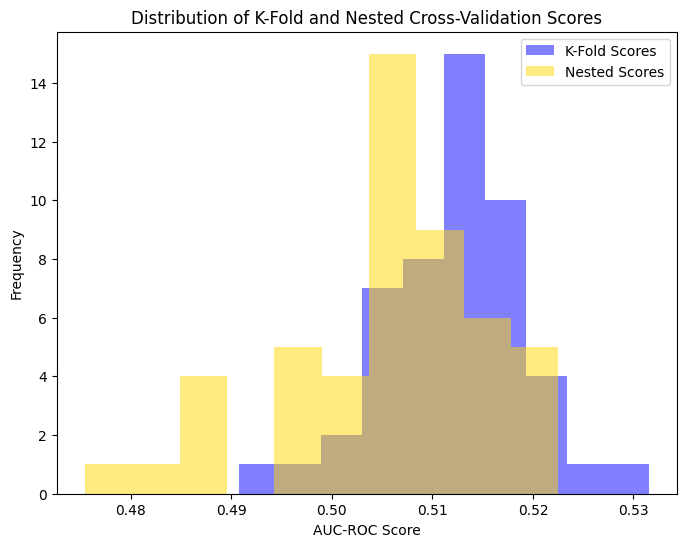

In [27]:
# Set the range of K values to explore
param_grid = {'n_neighbors': np.arange(1, 26)}

# Initialize lists to store scores
k_fold_scores = []
nested_scores = []

for i in range(50):
    # Update the random state in each iteration
    inner_cv = KFold(n_splits=10, shuffle=True, random_state=i) # also k-fold cross-validation
    outer_cv = KFold(n_splits=3, shuffle=True, random_state=i)
    
    # K-Fold Cross-Validation
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=inner_cv, scoring='roc_auc')
    k_fold_score = cross_val_score(grid_search, X_train, y_train, cv=inner_cv, scoring='roc_auc').mean()
    k_fold_scores.append(k_fold_score)
    
    # Nested Cross-Validation
    nested_score = cross_val_score(grid_search, X_train, y_train, cv=outer_cv, scoring='roc_auc').mean()
    nested_scores.append(nested_score)
    
# Plot histograms
plt.figure(figsize=(8, 6))
plt.hist(k_fold_scores, color='blue', alpha=0.5, label='K-Fold Scores')
plt.hist(nested_scores, color='gold', alpha=0.5, label='Nested Scores')

plt.title('Distribution of K-Fold and Nested Cross-Validation Scores')
plt.xlabel('AUC-ROC Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### 3.6 Conclusion

Based on the figure from 3.5, would you adjust your answer to question 3.4? In a couple of sentences, explain why overfitting can arise when doing model selection, and why nested cross-validation is a useful tool in preventing it. 

* It's closer to the expected out-of-sample performance, indicating to adjust answer in 3.4. It would further emphasize the importance of nested cross-validation in providing a more accurate estimate of a model's performance.
* This happens because the model's complexity is increased to capture noise or random fluctuations in the training set rather than the underlying signal. The same data is used both to select the model hyperparameters and to estimate model performance., leading to overly optimistic performance estimates and the selection of a model that performs well on the training data but poorly on unseen data.
* Nested cross-validation ensures that the performance estimation is always done on data that was not used in any way to choose the model or its hyperparameters. This separation helps in preventing the leakage of information from the test set into the model training process.